# FOODMATE RECOMMENDATION SYSTEM


## A. BUSINESS UNDERSTANDING.

## 1. Defining the question.

### a.) Specifying the data analytic question

> **Problem Statement**:The problem addressed by this dataset is the lack of easily accessible and comprehensive information about the nutritional values of common foods and products. This can make it difficult for people to make informed decisions about their diet and can contribute to health problems such as obesity and malnutrition.


### b.) Metric for success.

### c.) Understanding the context

The food and health industry is a highly competitive and crowded space. With so many diet plans, meal delivery services, and health apps available, it can be overwhelming for individuals to navigate and make informed decisions about their dietary choices. This creates a major business problem for stakeholders who want to provide effective solutions that meet the needs of their customers.
One major issue is the lack of personalized nutrition recommendations available in the market. Many existing meal delivery services and health apps provide generic diet plans that are not tailored to an individual's specific needs and preferences. This can lead to frustration and disappointment, as customers may not see the desired results and may eventually give up on their healthy eating goals altogether.
Another challenge is the time and effort required to plan and prepare healthy meals. Many individuals lead busy lives and do not have the time or energy to research and create nutritious meals every day. This can lead to unhealthy eating habits and may have negative consequences on their overall health and wellbeing.
To address these challenges, stakeholders need to develop innovative solutions that provide personalized and convenient dietary recommendations. The food recommender system with a chatbot offers a unique and effective solution that addresses these challenges. It utilizes advanced technology to analyze an individual's weight and BMI and provides personalized diet recommendations for breakfast, lunch, and dinner. It also includes easy-to-follow recipes for each meal, making healthy eating more accessible and convenient for individuals.
Overall, the business problem for stakeholders is to provide effective solutions that meet the needs of individuals in the highly competitive and crowded food and health industry. The food recommender system with a chatbot offers a unique and innovative solution that addresses the lack of personalized nutrition recommendations and the time and effort required to plan and prepare healthy meals.



### d.) Recording the experimental design.

### e.) Data relevance.

## B. DATA UNDERSTANDING.

In [1]:
#load the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load the Data Set.

In [2]:
recipes = pd.read_csv("/Users/mac/Downloads/maindata 2/RAW_recipes.csv")
nutrition = pd.read_csv("/Users/mac/Downloads/maindata 2/nutrition.csv",index_col=0)

In [3]:
#get a preview of the recipes data set
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
#get a preview of the nutrition data set
nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Data Understanding

This project will include 2 datasets 

**Recipes**

**Nutrition**

Recipes data set was obtained from [ here ](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions). It countains a a list of 230186 rows of recipes and 12 columns. 
*   name - Recipe name
*   id - Recipe ID
*   minutes - Minutes to prepare recipe
*   contributor_id - User ID who submitted this recipe
*   submitted - Date recipe was submitted
*   tags - Food.com tags for recipe
*   nutrition - Nutrition information (calories (#), total fat (PDV), sugar (PDV) ,sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
*   n_steps - Number of steps in recipe
*   steps - Text for recipe steps, in order
*   description - User-provided description
*   ingredients - List of ingredient names
*   n_ingredients - Number of ingredients



The nutrition dataset was obtained from [here](https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products).

This dataset contains information on approximately 8.8 thousand types of food. The dataset includes various features related to the nutrition value of each food item per 100gram serving. There are 75 features in total, you can find features like **calories**, **vitamin_d**, **zink**, **protein**, lactose. As you can see features names are very self-explanatory, so a description is not provided.

## C. DATA PREPROCESSING

In [5]:
#getting info of the nutrition data set.
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [6]:
# remaining with the relevant features for our model.
nutrition_df = nutrition.loc[:, ['name','serving_size','calories','total_fat','saturated_fat','cholesterol','sodium','potassium']]



> As seen,the nutrition data set has no missing data.However,the data set has object data types which need to be converted to numerical data types.

In [7]:
#creating a function that strips and converts feautures to float type
def clean_df(df, col_name):
  # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_df = df.copy()
    
    # Strip whitespace characters and replace non-numeric characters with nothing
    cleaned_df[col_name] = cleaned_df[col_name].str.strip().replace('[^\d\.]', '', regex=True)
    
    # Convert the column to float data type
    cleaned_df[col_name] = pd.to_numeric(cleaned_df[col_name], errors='coerce').astype(float)
    
    return cleaned_df
    

In [8]:
#cleaning all the columnns in the nutrition data frame.
cols_to_clean = [ 'serving_size','calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium','potassium' ]
for col in cols_to_clean:
  nutrition_df[col] = nutrition_df[col].astype(str)
  nutrition_df = clean_df(nutrition_df, col)

In [9]:
nutrition_df.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,potassium
0,Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,3.0
1,"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,410.0
2,"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,229.0
3,"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,427.0
4,"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,96.0


In [10]:
# renaming the columns 

nutrition_df = nutrition_df.rename(columns={'serving_size': 'serving_size(g)', 'total_fat': 'total_fat(g)', 
                                            'saturated_fat': 'saturated_fat(g)','cholesterol':'cholesterol(mg)',
                                            'sodium':'sodium(mg)','potassium':'potassium(mg)'})

In [11]:
# checking for the missing values
nutrition_df.isnull().sum()

name                   0
serving_size(g)        0
calories               0
total_fat(g)           0
saturated_fat(g)    1590
cholesterol(mg)        0
sodium(mg)             0
potassium(mg)          0
dtype: int64

In [12]:
# working on the missing values in the saturated fat column.
mean_value = nutrition_df["saturated_fat(g)"].mean()
nutrition_df["saturated_fat(g)"].fillna(mean_value,inplace=True)

In [13]:
#checking for duplicates.
nutrition_df.duplicated().sum()

0

> The dataset has no duplicates. 

In [14]:
#getting info of the recipes data set
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


> Most of the column rows are consistent but some rows will need to be dropped and/or replaced.

In [15]:
# creating a new recipes data frame of the recipes dataset with the relevant features.
recipes_df = recipes.loc[:, ['id','name','minutes','nutrition','tags','ingredients','steps']]

> For better analysis of the recipes data set, the nutrition column had to be stripped create separate columns.

In [16]:

#retrieving individual nutrients from the recipes data set.
recipes_df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes.nutrition.str.split(",",expand=True)
recipes_df['calories'] =  recipes_df['calories'].apply(lambda x: x.replace('[','')) 
recipes_df['carbohydrates (PDV)'] =  recipes_df['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))  

In [45]:
#dropping the nutrition column
recipes_df.drop(['nutrition'],axis=1)

,id,name,minutes,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,NaN,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,486161,zydeco soup,60,"['ham', '60-minutes-or-less', 'time-to-make', ...","['celery', 'onion', 'green sweet pepper', 'gar...","['heat oil in a 4-quart dutch oven', 'add cele...",415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,493372,zydeco spice mix,5,"['15-minutes-or-less', 'time-to-make', 'course...","['paprika', 'salt', 'garlic powder', 'onion po...",['mix all ingredients together thoroughly'],14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,308080,zydeco ya ya deviled eggs,40,"['60-minutes-or-less', 'time-to-make', 'course...","['hard-cooked eggs', 'mayonnaise', 'dijon must...","['in a bowl , combine the mashed yolks and may...",59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,298512,cookies by design cookies on a stick,29,"['30-minutes-or-less', 'time-to-make', 'course...","['butter', 'eagle brand condensed milk', 'ligh...",['place melted butter in a large mixing bowl a...,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [17]:
#cleaning all the columnns in the nutrition data frame.
cols_to_clean = [ 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)' ]
for col in cols_to_clean:
  recipes_df[col] = recipes_df[col].astype(str)
  recipes_df = clean_df(recipes_df, col)

In [18]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [19]:
#checking for null values.
recipes_df.isnull().sum()


id                     0
name                   1
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

## Exploratory Analysis.

In [20]:
#descriptive statistics for nutrition data set.
nutrition_df.describe()

,serving_size(g),calories,total_fat(g),saturated_fat(g),cholesterol(mg),sodium(mg),potassium(mg)
count,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,100.0,226.283878,10.556855,4.192791,38.723063,306.353851,265.251223
std,0.0,169.862001,15.818247,6.223870,117.358944,939.220468,371.443524
min,100.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,100.0,91.000000,1.000000,1.000000,0.000000,36.000000,111.000000
50%,100.0,191.000000,5.100000,3.200000,2.000000,84.000000,219.000000
75%,100.0,337.000000,14.000000,4.200000,65.000000,396.000000,329.000000
max,100.0,902.000000,100.000000,96.000000,3100.000000,38758.000000,16500.000000


> As seen from above,the average serving size is 100 g.Averagely,per serving the meals would have 226.28 calories.

In [21]:
#descriptive statistics for recipes data set.
recipes_df.describe()

,id,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,231637.000000,2.316370e+05,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403
std,141206.635626,4.461963e+06,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560
min,38.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,99944.000000,2.000000e+01,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000
50%,207249.000000,4.000000e+01,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000
75%,333816.000000,6.500000e+01,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000
max,537716.000000,2.147484e+09,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000


> Avaragely,a meal would take upto 40 minutes to be prepared.

## Nutrition dataset

In [22]:
nutrition_df.columns

Index(['name', 'serving_size(g)', 'calories', 'total_fat(g)',
       'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)'],
      dtype='object')

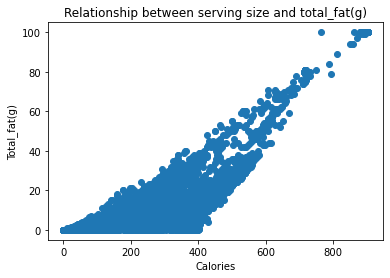

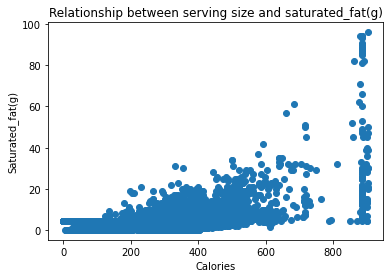

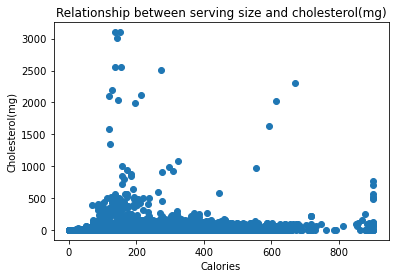

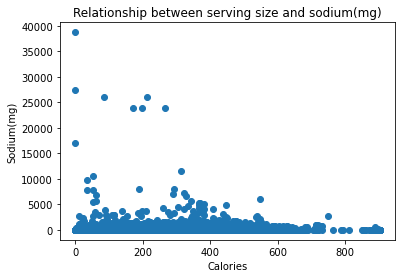

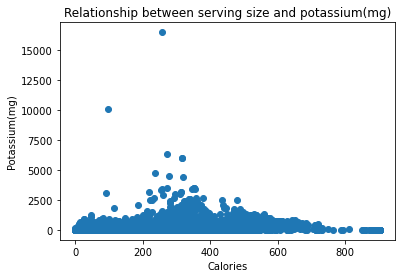

In [23]:
# Create a scatter plot for each nutrient column
nutrient_cols = [ 'total_fat(g)',
       'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)']

for col in nutrient_cols:
    plt.scatter(nutrition_df['calories'], nutrition_df[col])
    plt.xlabel('Calories')
    plt.ylabel(col.capitalize())
    plt.title('Relationship between serving size and {}'.format(col))
    plt.show()

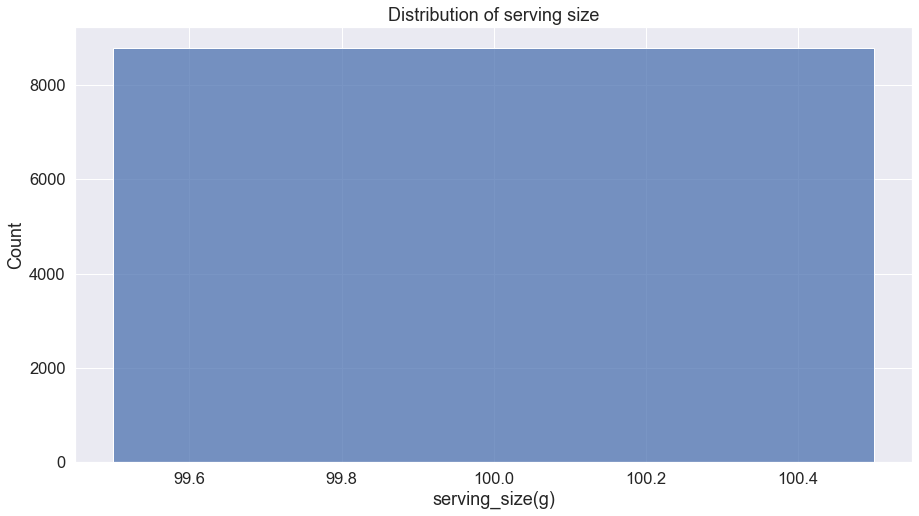

In [24]:
#distribution of serving size
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.title('Distribution of serving size')
sns.histplot(data=nutrition_df,x='serving_size(g)')
plt.show()

> In the dataset used,the serving size per food was 100 grams.

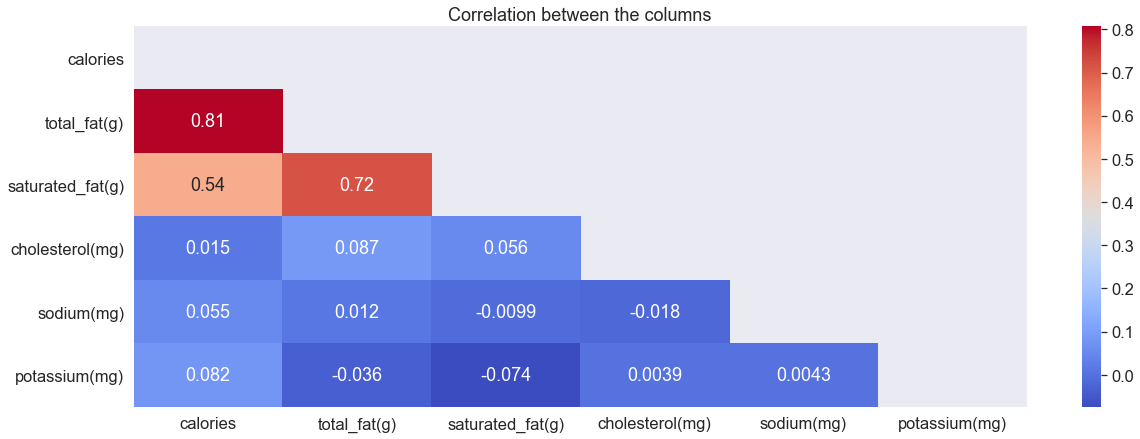

In [25]:
# Create a correlation matrix of the columns of interest
corr_matrix = nutrition_df[['calories','total_fat(g)',
       'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)']].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn
plt.figure(figsize=(20,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask)
# Show the plot
plt.title('Correlation between the columns')
plt.show()

 The highest correlation is seen between the number of and the amount of total fat in the food specificied.Given a scenario a user wants to reduce the number of calorie intake,they would need to avoid foods with high total fat.

## Recipes dataset

> As the recipe is too big and would take up too much computational power,a random sample will be retrieved.

In [26]:
# getting the recipes random sample.
recipes_sample_df = recipes_df.sample(n=2000, random_state=42)

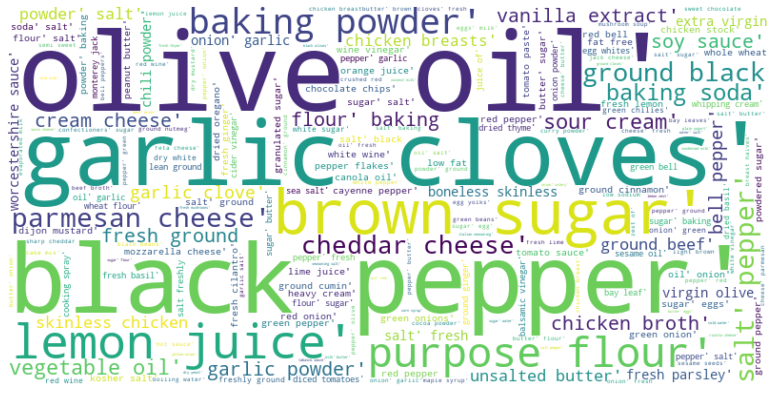

In [27]:
# Concatenate all ingredients into a single string
all_ingredients = ' '.join(recipes_df['ingredients'])

# Create a word cloud
plt.figure(figsize=(20,7))
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_ingredients)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The most popular ingredients used by the users for their recipes include garlic,cloves,olive oil and black pepper.

# Implementing the solution

### Outliers

In [28]:
# numerical columns
num_cols = recipes_df.select_dtypes(exclude = ['object'])

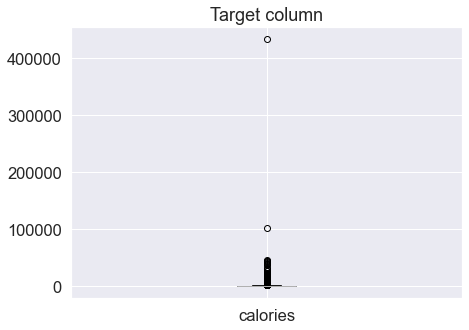

In [29]:
fig=plt.figure(figsize=(7,5))
recipes_df.boxplot("calories")
plt.title("Target column")
plt.show()

In [30]:
recipes_df.columns

Index(['id', 'name', 'minutes', 'nutrition', 'tags', 'ingredients', 'steps',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)'],
      dtype='object')

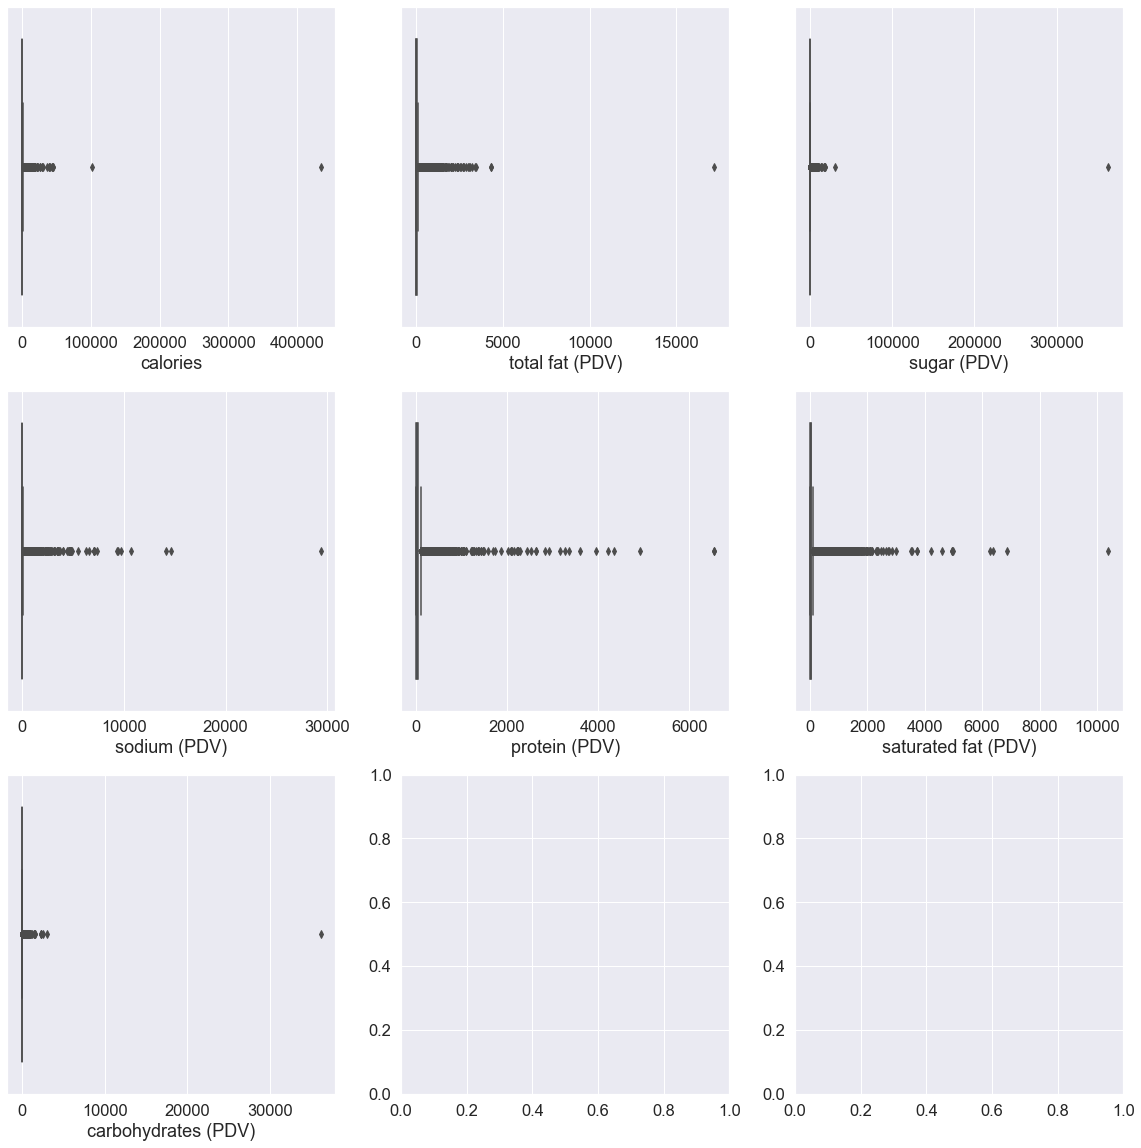

In [31]:
fig, axes = plt.subplots(3,3, figsize=(20,20))
sns.boxplot(ax=axes[0,0], x=recipes_df['calories'])
sns.boxplot(ax=axes[0,1], x=recipes_df['total fat (PDV)'])
sns.boxplot(ax=axes[0,2], x=recipes_df['sugar (PDV)'])
sns.boxplot(ax=axes[1,0], x=recipes_df['sodium (PDV)'])
sns.boxplot(ax=axes[1,1], x=recipes_df['protein (PDV)'])
sns.boxplot(ax=axes[1,2], x=recipes_df['saturated fat (PDV)'])
sns.boxplot(ax=axes[2,0], x=recipes_df['carbohydrates (PDV)']);

In [32]:
#create a function that removes outliers
def outlierRemover(df, columns):
    for x in columns:
        q25,q75 = np.percentile(df[x],[25,75])
        intr_qr = q75-q25
        min_val = q25-(1.5*intr_qr)
        max_val = q75+(1.5*intr_qr)
        df.loc[df[x] < min_val, x] = np.nan
        df.loc[df[x] > max_val, x] = np.nan
    return df

In [33]:
#calling the removing outlier function
num_cols = ["calories", 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']
recipes_df = outlierRemover(recipes_df, num_cols)

## D. MODELLING

### Baseline Model.

In [34]:

class CalorieBasedRecommender:
    
    def __init__(self, df):
        self.df = df
        
    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] <= target_calories:
                recommendations.append(row['name'])
            if len(recommendations) == num_recommendations:
                break
        return recommendations


This is the baseline model with a class that takes in the dataframe.The recommend method takes as input a target calorie value and the number of recommendations desired, and returns a list of food recommendations that have equal  calories than the target calorie value.

In [35]:
recommender = CalorieBasedRecommender(nutrition_df)
target_calories = 1000
num_recommendations = 1

recommendations = recommender.recommend(target_calories, num_recommendations)


In [36]:
recommendations

['Cornstarch']

In [37]:
recommender = CalorieBasedRecommender(nutrition_df)
target_calories = 200
num_recommendations = 10

recommendations = recommender.recommend(target_calories, num_recommendations)

In [38]:
recommendations

['Eggplant, raw',
 'Sherbet, orange',
 'Cauliflower, raw',
 'Taro leaves, raw',
 'PACE, Picante Sauce',
 'Mango nectar, canned',
 'Quail, raw, meat only',
 'Peppers, raw, jalapeno',
 'Winged bean tuber, raw',
 'Salami, turkey, cooked']

In [39]:

class CalorieBasedRecommender1:
    
    def __init__(self, df):
        self.df = df
        
    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] == target_calories:
                recommendations.append((row['name'], row['ingredients'],row['steps']))
            if len(recommendations) == num_recommendations:
                break
        return recommendations


In [50]:
recommender = CalorieBasedRecommender1(recipes_df)
target_calories = 51.5
num_recommendations = 1

recommendations = recommender.recommend(target_calories, num_recommendations)

In [51]:
recommendations

[('arriba   baked winter squash mexican style',
  "['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",
  "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']")]

In [42]:
recipes_df.head()

,id,name,minutes,nutrition,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,NaN,23.0,3.0,0.0,28.0


## E. EVALUATION.